<a href="https://colab.research.google.com/github/sensiboi/HR-Analytics-Workforce-Trends-and-Decision-Support-System/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR Analytics: Workforce Trends and Decision Support System**

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [3]:
df=pd.read_csv("HRIS_dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data Cleaning

In [4]:
#Handle missing numeric values
df = df.fillna(df.median(numeric_only=True))
#Handle missing categorical values
df = df.fillna("Unknown")

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Basic HR KPIs

In [8]:
total_employees = df['EmployeeNumber'].nunique()
attrition_rate = (df['Attrition'] == 'Yes').mean() * 100
avg_salary = df['MonthlyIncome'].mean()
avg_tenure = df['YearsAtCompany'].mean()
print(f"Total Employees: {total_employees}")
print(f"Attrition Rate: {attrition_rate:.2f}%")
print(f"Average Monthly Income: ₹{avg_salary:.0f}")
print(f"Average Tenure: {avg_tenure:.1f} years")

Total Employees: 1470
Attrition Rate: 16.12%
Average Monthly Income: ₹6503
Average Tenure: 7.0 years


Workforce Analytics and Visuals

Attrition by Department

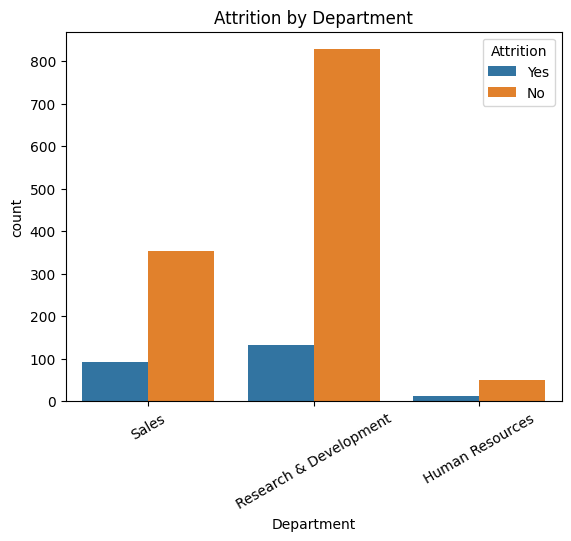

In [9]:
plt.figure()
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()

Salary Vs Performance

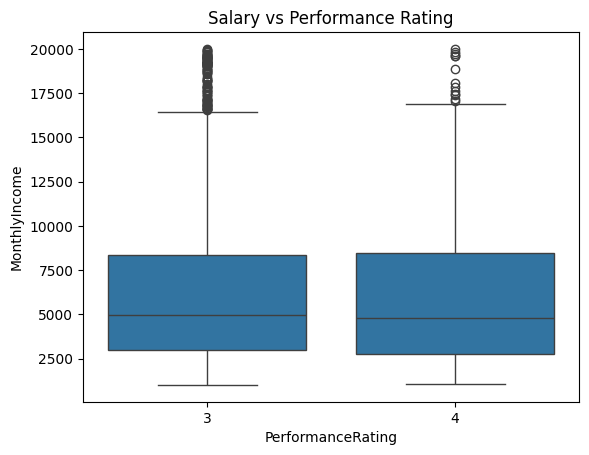

In [10]:
plt.figure()
sns.boxplot(data=df, x='PerformanceRating', y='MonthlyIncome')
plt.title("Salary vs Performance Rating")
plt.show()

Tenure Distribution

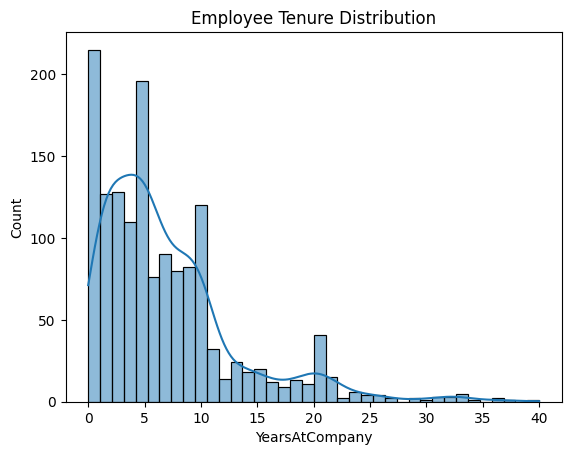

In [11]:
plt.figure()
sns.histplot(df['YearsAtCompany'], kde=True)
plt.title("Employee Tenure Distribution")
plt.show()

Attrition Risk Flag [Decision Support]

In [12]:
df['Attrition_Risk'] = np.where(
    (df['JobSatisfaction'] <= 2) & (df['WorkLifeBalance'] <= 2),
    'High',
    'Low'
)

HR Decision Support Insight

In [13]:
high_risk_employees = df[df['Attrition_Risk'] == 'High'].shape[0]
print(f"Employees with High Attrition Risk: {high_risk_employees}")

Employees with High Attrition Risk: 154


Employee Lookup Feature

In [20]:
def get_employee_details(employee_number):
    record = df[df['EmployeeNumber']== employee_number]
    if record.empty:
        return "Employee Number not found. Please check the name."
    record = record.iloc[0]
    summary = {
        "Employee Number": record['EmployeeNumber'],
        "Department": record['Department'],
        "Job Role": record['JobRole'],
        "Age": record['Age'],
        "Monthly Income": record['MonthlyIncome'],
        "Years at Company": record['YearsAtCompany'],
        "Performance Rating": record['PerformanceRating'],
        "Job Satisfaction": record['JobSatisfaction'],
        "Work Life Balance": record['WorkLifeBalance'],
        "Attrition Status": record['Attrition'],
        "Attrition Risk": record['Attrition_Risk'],
        "HR Recommendation": (
            "Immediate engagement & retention plan"
            if record['Attrition_Risk'] == 'High'
            else "Continue current engagement strategy"
        )
    }
    return summary

Testing the Feature

In [21]:
get_employee_details(10)

{'Employee Number': np.int64(10),
 'Department': 'Research & Development',
 'Job Role': 'Laboratory Technician',
 'Age': np.int64(59),
 'Monthly Income': np.int64(2670),
 'Years at Company': np.int64(1),
 'Performance Rating': np.int64(4),
 'Job Satisfaction': np.int64(1),
 'Work Life Balance': np.int64(2),
 'Attrition Status': 'No',
 'Attrition Risk': 'High',
 'HR Recommendation': 'Immediate engagement & retention plan'}